# 1.Numpy进阶

如果有问题请在群里讨论，题意问题请@姜腾

ddl周六（3.26）23:59，提交前请自己重启kernel运行一遍，只提交ipynb文件，不要把数据和照片打包，代码也不要把图片保存（不要imsave,只要imshow）

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1.1 Cauchy Matrix（1.5分）

Cauchy矩阵是一种在多个领域（控制论，插值，矩阵论）都有广泛应用的矩阵，具体定义如下引用自[Wikipedia](https://en.wikipedia.org/wiki/Cauchy_matrix#:~:text=In%20mathematics%2C%20a%20Cauchy%20matrix%2C%20named%20after%20Augustin,n%20matrix%20with%20elements%20aij%20in%20the%20form)：

In mathematics, a Cauchy matrix, named after Augustin Louis Cauchy, is an $m \times n$ matrix with elements $a_{i j}$ in the form
$$
a_{i j}=\frac{1}{x_{i}-y_{j}} ; \quad x_{i}-y_{j} \neq 0, \quad 1 \leq i \leq m, \quad 1 \leq j \leq n
$$
where $x_{i}$ and $y_{j}$ are elements of a field $\mathcal{F}$, and $\left(x_{i}\right)$ and $\left(y_{j}\right)$ are injective sequences (they contain distinct elements).

特别的，大家喜闻乐见的希尔伯特矩阵就是在$x_{i}-y_{j}=i+j-1$条件下的一种特殊Cauchy矩阵。

本题要求用两种方法：Ufunc和nditer两种方式实现示例的Cauchy矩阵计算，并将输出打印。

In [2]:
A = np.arange(5).reshape(5,1) + 4
B = np.arange(3).reshape(1,3)
print(A)
print(B)

[[4]
 [5]
 [6]
 [7]
 [8]]
[[0 1 2]]


In [8]:
# 使用ufunc，TODO
C1=np.multiply(-1,B)
C2=np.add(A,C1)
C3=np.add(C2,1)
C4=np.divide(1,C3)
print(C4)

[[0.2        0.25       0.33333333]
 [0.16666667 0.2        0.25      ]
 [0.14285714 0.16666667 0.2       ]
 [0.125      0.14285714 0.16666667]
 [0.11111111 0.125      0.14285714]]


In [22]:
# 使用nditer，TODO
list=[]
for x,y in np.nditer([A,B]):
    list.append(1/(x-y+1))       
D=np.array(list).reshape(5,3)
print(D)

[[0.2        0.25       0.33333333]
 [0.16666667 0.2        0.25      ]
 [0.14285714 0.16666667 0.2       ]
 [0.125      0.14285714 0.16666667]
 [0.11111111 0.125      0.14285714]]


### 1.2 Element-wise计算的性能分析（1.5分）

以下是一些将一个矩阵每个元素平方的函数实现。结合课上内容，查阅资料，总结出5条以上有意义的发现。


如：
1. 用户自定义的ufunc性能不如numpy自带的ufunc，是因为numpy自带函数底层用C实现。

In [7]:
import timeit
from numba import jit
import numpy as np

data = np.random.randint(10, size=(500, 300))

def pow_build_in(d):
    return data*data

def pow_ufunc(d):
    return np.square(d)

def pow_my_ufunc(d):
    return np.frompyfunc(lambda x:x*x,1,1)(d)

def pow_loop(d): 
    res = np.zeros_like(d) 
    for i in range(500): 
        for j in range(300): 
            res[i,j]=d[i,j] ** 2 
    return res

@jit
def pow_loop_jit(d): 
    res = np.zeros_like(d) 
    for i in range(500): 
        for j in range(300): 
            res[i,j]=d[i,j] ** 2 
    return res

def pow_loop_per_row(d): 
    res = np.zeros_like(d) 
    for i in range(500): 
        res[i,:] = d[i,:] ** 2 
    return res

@jit
def pow_loop_per_row_jit(d): 
    res = np.zeros_like(d) 
    for i in range(500): 
        res[i,:] = d[i,:] ** 2 
    return res

def pow_nditer_default(d):
    res = np.zeros_like(d) 
    it = np.nditer([d, res], op_flags=['readwrite']) 
    for i, r in it:
        r[...] = i ** 2 
    return res 

def pow_nditer_multi(d):
    res = np.zeros_like(d) 
    it = np.nditer([d, res], flags =['multi_index'], op_flags=['readwrite']) 
    for i, r in it: 
        r[...] = i ** 2 
    return res 

def pow_nditer_ext_by_C(d): 
    d = np.array(d, order = 'C') 
    res = np.zeros_like(d, order = 'C') 
    it = np.nditer([d, res], flags = ['external_loop'], op_flags=['readwrite'], order='C') 
    for i, r in it: 
        r[...] = i ** 2 
    return res 

def pow_nditer_ext_by_F(d): 
    d = np.array(d, order = 'F') 
    res = np.zeros_like(d, order = 'F') 
    it = np.nditer([d, res], flags = ['external_loop'], op_flags=['readwrite'], order='F') 
    for i, r in it: 
        r[...] = i ** 2 
    return res 

def pow_nditer_ext_bad(d):  
    d = np.array(d, order = 'C') 
    res = np.zeros_like(d, order = 'C') 
    it = np.nditer([d, res], flags = ['external_loop'], op_flags=['readwrite'], order='F') 
    for i, r in it: 
        r[...] = i ** 2 
    return res 


%timeit pow_build_in(data)
%timeit pow_ufunc(data)
%timeit pow_my_ufunc(data)
%timeit pow_loop(data)
%timeit pow_loop_jit(data)
%timeit pow_loop_per_row(data)
%timeit pow_loop_per_row_jit(data)
%timeit pow_nditer_default(data)
%timeit pow_nditer_multi(data)
%timeit pow_nditer_ext_by_C(data)
%timeit pow_nditer_ext_by_F(data)
%timeit pow_nditer_ext_bad(data)

83.4 µs ± 11.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
62.2 µs ± 1.16 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
14.6 ms ± 253 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
60.6 ms ± 1.79 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
218 µs ± 5.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
853 µs ± 20.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
190 µs ± 23.2 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
130 ms ± 2.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
138 ms ± 3.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
293 µs ± 20.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
409 µs ± 35.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
897 µs ± 8.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


输入你的发现：
1.jit及时编译，可以提高代码运行速度
2.单层循环要比双层循环快，说明对数组切片整体操作要快于单个操作
3.flags=['multi_index']表示对数组进行多重索引，比C-order/Fortran-order快
4.按照数组存储方式/存储顺序进行遍历更快，这与空间局部性有关；如果数组存储方式与遍历顺序不一致会减慢速度
5.numpy自带的ufunc速度最快，它底层是c语言实现的

# 2.PCA 与 KMeans


### 2.1 债券yield curve的降维与重建：（4分+1分（最后1分为附加分））

PCA在各个领域的应用十分广泛，比如我们喜闻乐见的金融领域。我们都知道债券这种金融产品有各种期限结构，比如三个月后，一年后或者三十年后到期。

同时我们还知道债券有收益率（[bond yield](https://wiki.mbalib.com/wiki/Bond_yield)）这种属性，但是完成本次作业不用知道它到底是个啥，只需要知道它在金融领域里十分重要。

我们把每一天的数据想象成一个样本（Sample），这一天的各个期限的债券的收益率当成特征（Feature），就构成了我们基本问题。

In [69]:
import pandas as pd
import numpy as np

In [70]:
# 载入数据集，不用操作
maturities=list(range(1,31))

path='./YC-dataset.csv'

dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
yields_df = (pd.read_csv(path,index_col='TIME_PERIOD',parse_dates=['TIME_PERIOD'],date_parser=dateparse)).iloc[:,9:] # 不要月度的

display(yields_df)

<ipython-input-70-db8264264d7d>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')


,Yield 1Y,Yield 2Y,Yield 3Y,Yield 4Y,Yield 5Y,Yield 6Y,Yield 7Y,Yield 8Y,Yield 9Y,Yield 10Y,...,Yield 21Y,Yield 22Y,Yield 23Y,Yield 24Y,Yield 25Y,Yield 26Y,Yield 27Y,Yield 28Y,Yield 29Y,Yield 30Y
TIME_PERIOD,,,,,,,,,,,,,,,,,,,,,
2004-09-06,2.298838,2.641262,2.951578,3.223235,3.457222,3.657429,3.828505,3.974939,4.100712,4.209220,...,4.808953,4.836016,4.860795,4.883558,4.904536,4.923925,4.941896,4.958596,4.974153,4.988680
2004-09-07,2.328891,2.679766,2.987293,3.252486,3.479518,3.673463,3.839294,3.981472,4.103839,4.209626,...,4.798185,4.824870,4.849308,4.871763,4.892459,4.911590,4.929323,4.945804,4.961158,4.975495
2004-09-08,2.346666,2.706542,3.016998,3.282196,3.507894,3.699959,3.863753,4.003922,4.124390,4.228419,...,4.805488,4.831593,4.855497,4.877459,4.897700,4.916408,4.933749,4.949863,4.964876,4.978894
2004-09-09,2.308988,2.646224,2.945649,3.206136,3.430628,3.623456,3.789113,3.931745,4.054972,4.161872,...,4.763395,4.790922,4.816145,4.839332,4.860711,4.880479,4.898808,4.915844,4.931719,4.946545
2004-09-10,2.271566,2.589654,2.884699,3.146724,3.374729,3.571385,3.740559,3.886214,4.011975,4.120981,...,4.732636,4.760578,4.786181,4.809716,4.831415,4.851478,4.870080,4.887372,4.903483,4.918530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-11,-0.695685,-0.736587,-0.742015,-0.721247,-0.682578,-0.632747,-0.576889,-0.518722,-0.460807,-0.404815,...,-0.004521,0.016114,0.035088,0.052575,0.068729,0.083685,0.097566,0.110478,0.122514,0.133759
2019-10-14,-0.685560,-0.729403,-0.737113,-0.718293,-0.681391,-0.633212,-0.578914,-0.522217,-0.465682,-0.410976,...,-0.019410,0.000780,0.019346,0.036456,0.052262,0.066896,0.080478,0.093112,0.104889,0.115892
2019-10-15,-0.679990,-0.718825,-0.727927,-0.712891,-0.680158,-0.635631,-0.584153,-0.529421,-0.474097,-0.419996,...,-0.022825,-0.002070,0.017025,0.034631,0.050899,0.065965,0.079951,0.092961,0.105091,0.116424


从上面看来，我们有3868个样本，30个特征（1年到期的债券收益率到30年到期的债券收益率），但是这个特征太多了，我们想通过PCA提取不同期限的共同特征，这样在将来比如预测债券收益率曲线泛化能力也会提升。

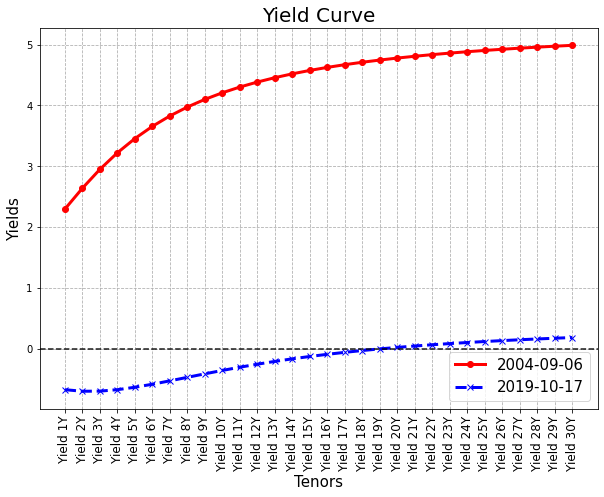

In [71]:
# 以下也是为了帮大家理解本题任务，不用操作
# 画出第一天和第二天的债券收益率曲线
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(yields_df.iloc[0],linestyle='-',marker='o',color='r',lw=3, label='2004-09-06')
ax.plot(yields_df.iloc[-1],linestyle='--',marker='x',color='b',lw=3, label='2019-10-17')
ax.axhline(y=0,ls='--',c='k',alpha=0.9)
ax.grid(linestyle='--')
ax.legend(loc = 'lower right', frameon=True, fontsize=15)
ax.xaxis.set_tick_params(rotation=90,labelsize=12)
ax.set_xlabel('Tenors', fontsize=15)
ax.set_ylabel('Yields', fontsize=15)
ax.set_title('Yield Curve', fontsize=20)
yields = yields_df.to_numpy() # 可以选择用numpy，也建议用numpy

### 2.1.1 用PCA提取主成分：（记得数据标准化，可以考虑用sklearn.preprocessing模块）

(3868, 30)
[ 2.91526179e+01  8.01109344e-01  3.88411588e-02  1.19882245e-02
  2.90473076e-03  2.76360592e-04  1.79762230e-05  2.10879690e-06
  1.04462353e-07  7.92435254e-09  3.87195921e-10  1.95299609e-11
  7.24565188e-13  3.37248846e-14  1.31442446e-15  8.90810370e-16
 -9.37468537e-16 -8.73797205e-16  6.48673804e-16  3.50194482e-16
 -4.61700040e-16  2.72151503e-16  1.67567237e-16 -3.77734317e-16
  7.59645282e-17  1.66227806e-17 -5.86043509e-17 -2.90464220e-16
 -2.16426171e-16 -1.74245539e-16]


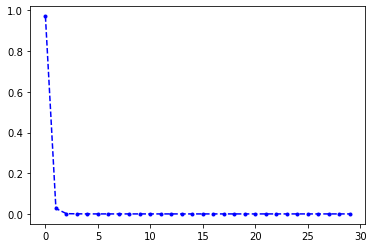

In [72]:
# todo
print(yields.shape)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
yields_std=StandardScaler().fit_transform(yields)
cov=np.cov(yields_std.T)
vals,vecs=np.linalg.eig(cov)

print(vals)
pairs=[(np.abs(vals[i]),vecs[:,i]) for i in range(len(vals))]
pairs.sort(key=lambda x:x[0],reverse=True)
sumVals=sum(vals)
var_exp=[(i/sumVals) for i in sorted(vals,reverse=True)]

fig, ax = plt.subplots()
x=list(range(30))
ax.plot(x,var_exp,color='b',linestyle='--',marker='.')
plt.show()

In [73]:
#取3个主成分
pca=PCA(n_components=3).fit(yields)
myvecs=pca.components_
myvals=pca.singular_values_
print(myvals)
reduce=pca.fit_transform(yields)
print(reduce.shape)

[507.01834046  87.7082001   18.83065883]
(3868, 3)


### 2.1.2 绘制对原数据变换后的前3个主成分随时间的变化图：

[[-10.64278014  -0.7694225   -0.30008827]
 [-10.64470833  -0.68626803  -0.27969127]
 [-10.72212497  -0.65146391  -0.25220078]
 ...
 [ 14.27738244   2.04641668   0.40623939]
 [ 13.85325314   1.91160109   0.38246105]
 [ 13.93545593   1.96146393   0.40609516]]


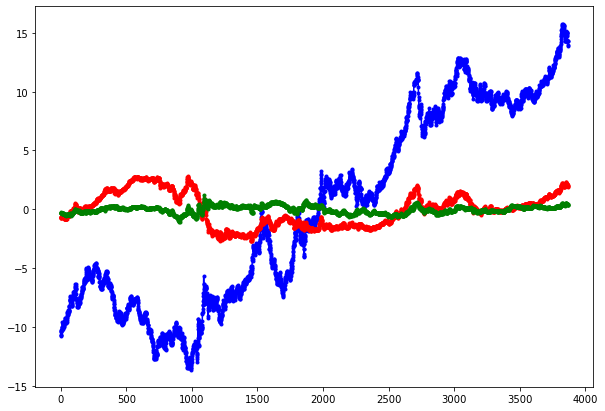

In [52]:
# todo
fig, ax = plt.subplots(figsize=(10,7))
x=list(range(3868))
ax.plot(x,reduce[:,0],color='b',linestyle='-',marker='.')
ax.plot(x,reduce[:,1],color='r',linestyle='-',marker='.')
ax.plot(x,reduce[:,2],color='g',linestyle='-',marker='.')
plt.show()

### 2.1.3 计算每个主成分解释的方差，并以合理的可视化。（如：柱状图，折线图，表格，可以参考PPT等）

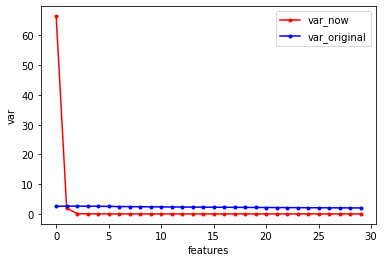

In [75]:
# todo
pca1=PCA(n_components=30).fit(yields)
reduce1=pca1.fit_transform(yields)
var_now=reduce1.var(axis=0)
var_original=yields.var(axis=0)


x=list(range(30))
plt.plot(x,var_now,color='r',linestyle='-',marker='.',label='var_now')
plt.plot(x,var_original,color='b',linestyle='-',marker='.',label='var_original')
plt.xlabel("features")
plt.ylabel("var")
plt.legend()
plt.show()

### 2.1.4 绘制前三个特征向量(横轴为30个期限，纵轴为对应期限在前三个特征方向上的载荷）：
给出了一个示例输出，因为每个人的操作不同所以很可能**很不一样**

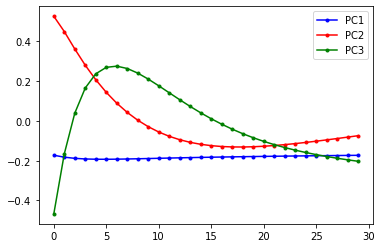

In [81]:
# todo
s=pca.components_
x=list(range(30))
plt.plot(x,s[0,:],color='b',linestyle='-',marker='.',label='PC1')
plt.plot(x,s[1,:],color='r',linestyle='-',marker='.',label='PC2')
plt.plot(x,s[2,:],color='g',linestyle='-',marker='.',label='PC3')
plt.legend()
plt.show()

### 2.1.5（附加题，1分） 分别用第1个，前2个，前3个因子重建最近一天（2019年10月17日）的yield curve.

对比三张图：你能给每个PC取个名字吗？（不算分）

In [180]:
def PCA_reconstruct(dim):
    # todo
    pca=PCA(n_components=dim).fit(yields)
    arr=pca.inverse_transform(pca.fit_transform(yields))
    x=list(range(1,31))
    fig, ax = plt.subplots(figsize=(10,7))
    ax.plot(x,arr[-1],linestyle='-',marker='o',color='r',lw=3, label='2004-09-06')
    ax.plot(x,yields[-1],linestyle='--',marker='x',color='b',lw=3, label='2019-10-17')
    ax.axhline(y=0,ls='--',c='k',alpha=0.9)
    ax.grid(linestyle='--')
    ax.legend(loc = 'lower right', frameon=True, fontsize=15)
    ax.xaxis.set_tick_params(rotation=90,labelsize=12)
    ax.set_xlabel('Tenors', fontsize=15)
    ax.set_ylabel('Yields', fontsize=15)
    ax.set_title('Yield Curve', fontsize=20)

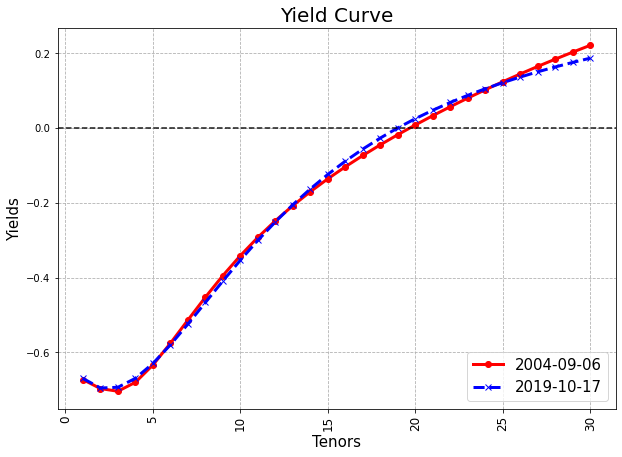

In [181]:
# 以下给出了另外一天的重建曲线，还是一样的，每个人的方法不同，得到的结果也可能不同
PCA_reconstruct(3)

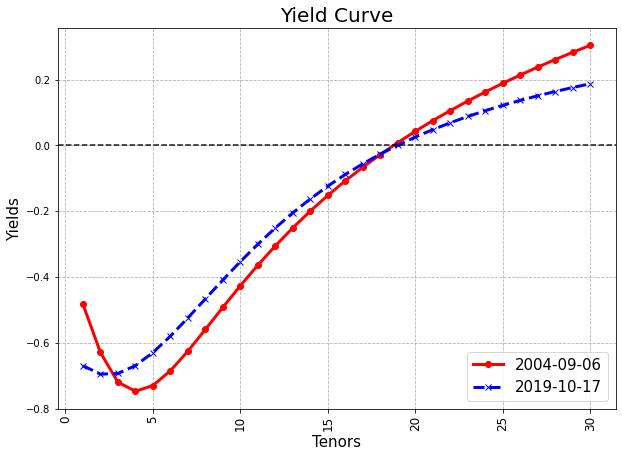

In [182]:
PCA_reconstruct(2)

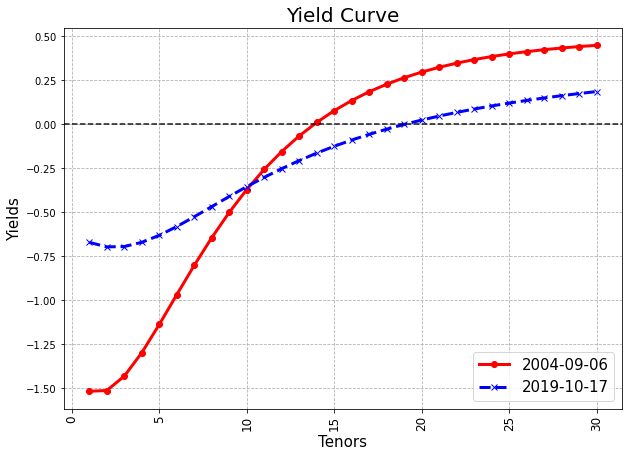

In [183]:
PCA_reconstruct(1)

### 2.2 numpy综合与聚类：图片处理与颜色压缩（3分）

计算机图形学中，颜色可以被量化为颜色空间。彩色图像一般有红绿蓝三个通道，每个通道取值通常为0~255。如果两个像素点只是在单个通道只有细微差异（例如R197G255B25和R198G255B25），在存储上也是不同的，但从观感来讲这两种色彩对我们来说基本没有区别。色彩量化就是找到一些具有代表性的颜色（16,32,64种）来表示全图像，量化前每个像素需要3bytes存储，量化后只需要存储其色彩标号，为1个byte。因此使得需要的存储空间大大减小。

首先我们有一张猫猫图，来自于北大猫协的公众号。


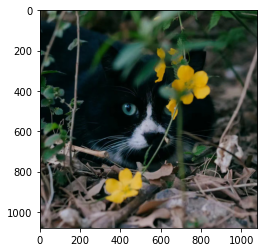

In [82]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

plt.figure()
img = plt.imread('./cat.jpeg')
plt.imshow(img)

把颜色分布画在3维坐标图上，颜色使用点对应的颜色。（本来想出成题的，但是这次就算了）

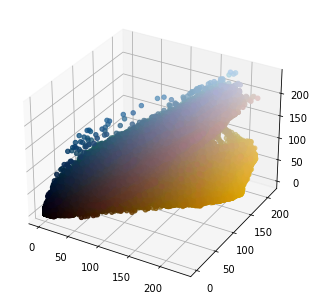

In [83]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
shape = img.shape
I = img.reshape(shape[0]*shape[1], shape[2])
ax.scatter(I[:,0],I[:,1],I[:,2],c=I.reshape(-1, 3)/255)
plt.show(ax)

##### 想法一（naive approach）：计算特定颜色的使用次数，并使用最常见的颜色进行量化（量化到16色）


1. 加载图片
2. 找出独特颜色的数量及其频率
3. 找到出现频率最高的16个颜色（考察numpy操作）
4. 用最接近的颜色替换原始图像中的颜色（计算距离，可以使用scipy.spatial包）
5. 展示

In [151]:
# todo
A=[]
for i in range(1080):
    for j in range(1080):
        A.append(img[i][j][0]*256*256+img[i][j][1]*256+img[i][j][2])

In [169]:
from collections import Counter
dic=dict(Counter(A))
lst=[]
dic_sorted = sorted(zip(dic.values(), dic.keys()))
dic_sorted.reverse()
for i in dic_sorted:
    lst.append(i[1])
    if len(lst)>=16:
        break
lst2=[]
for i in lst:
    lst2.append([i//(256*256),(i%(256*256))//256, i%256])
C=np.array(lst2)
print(C)

[[ 0  4  3]
 [ 0  9  8]
 [ 1  9 11]
 [ 1 11 12]
 [ 1 10  9]
 [ 0  8 10]
 [ 0  8  7]
 [ 0 12 12]
 [ 1 13 13]
 [ 0 10 11]
 [ 1 12 14]
 [ 1  5  4]
 [ 0 14 17]
 [ 2 11 10]
 [ 2  8  6]
 [ 1  7  5]]


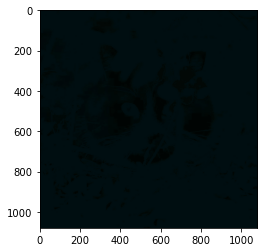

In [179]:
data=img.reshape(shape[0]*shape[1],shape[2])
newdata=np.zeros_like(data)
from scipy.spatial.distance import cityblock
for i in range(1080*1080):
    minindex=0
    mindis=1000000
    for j in range(16):
        tmp=cityblock(data[i],C[j])
        if mindis>tmp:
            mindis=tmp
            minindex=j
    
    newdata[i]=C[minindex]

img6=newdata.reshape(1080,1080,3)
plt.imshow(img6)

把量化后的16个颜色分布画在3维坐标图上，颜色使用点对应的颜色。（本来想出成题的，但是这次就算了）

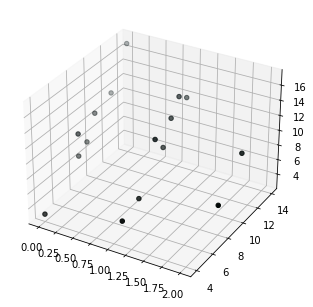

In [153]:
from mpl_toolkits.mplot3d import Axes3D
# C存储的是最频繁的颜色，你可以自己命名变量
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(C[:,0],C[:,1],C[:,2],c=C.reshape(-1, 3)/255)
plt.show(ax)

##### 想法二（sophisticated approach）：K-Means

可以看到上面的方法颜色的失真十分严重，这是因为一些颜色比较微小的变化可能在原始图像中被过度表达，因此将出现在最常见的颜色中。从颜色空间中也可以看出来。我们需要另一种方法：也就是我们课上讲过的kmeans方法。寻找16个“颜色质心”，周围点用质心替代。可以调包，也可以自己实现。请在如下的block中实现。

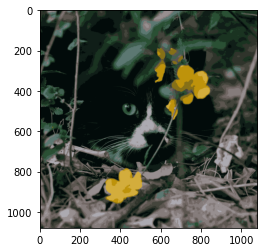

In [107]:
# todo
import cv2
data=np.float32(img).reshape((-1,3))
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)
ret, label, center = cv2.kmeans(data, 16, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
result = center[label.flatten()]
result = result.reshape(img.shape)
plt.imshow(result)

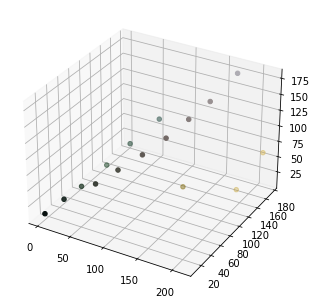

In [108]:
from mpl_toolkits.mplot3d import Axes3D
# 这里面的centroids是我存的颜色质心，你完全可以自己定义。

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(center[:,0],center[:,1],center[:,2],c=center.reshape(-1, 3)/255)

### 附加题：PCA的另类用法（1分）

在著名的神经网络论文AlexNet中曾提出了一种使用PCA进行数据增强的算法，称之为PCA jitter。所谓数据增强，就是通过对训练数据人为的加噪声，提高模型鲁棒性与预测能力的方法。从观感来讲，PCA jitter近似对光效的变化，对比直接对RGB通道进行加噪声会获得更少的颜色的失真。请尝试按如下步骤对猫猫图基于PCA进行augmentation，生成4个结果并展示。


1. 将图片按照RGB三通道标准化，均值为0，方差为1。
2. 将图片按照channel展平成大小为(*, 3)的array
3. 对上述array求协方差矩阵
4. 对协方差矩阵进行特征分解
5. 对特征值进行“抖动”，抖动幅度自行设定，可以同样从正态分布中抽样
6. 还原图片（想想如何还原？需要进行一些数学推演）并展示

如果你能按照上面的步骤操作下来，一定会对PCA有更深刻的理解！
提示：
1. 要注意存储颜色的数据类型的转换，并对RGB的颜色用可能会踩一些坑，注意自己的数据是np.uint8，np.float32，np.int32还是什么？
2. RGB如果超出了0～255要用np.clip剪切处理一下
3. 参考[原论文](https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf)

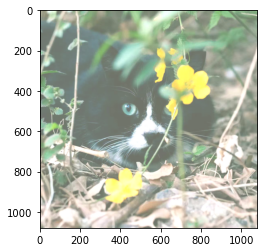

In [24]:
# todo
